# <a id = '1'>1. Introduction</a>

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# <a id = '2'>2. Importing the data</a>

In [64]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Print full rows 
pd.set_option('display.max_rows', None)

In [3]:
# Input the csv file 
test = pd.read_csv(r"C:\Users\minhh\Documents\Python Project\House_Price\test.csv")
train = pd.read_csv(r"C:\Users\minhh\Documents\Python Project\House_Price\train.csv")
df_list = %who_ls DataFrame 

In [4]:
# Shape of each df 
for df in df_list: 
    print('Size of ' + str(df) + ' is :' + str(globals()[df].shape))

Size of test is :(1459, 80)
Size of train is :(1460, 81)


In [5]:
# Append 2 table, however the column saleprice of test table will be null 
test['SalePrice'] = ''

full = pd.concat([train,test], ignore_index = True)

# <a id='3'>3. Glimpse of Data</a>

In [6]:
# Shape of the dataframe 
print(full.shape)

(2919, 81)


In [7]:
# List of columns
print(full.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

I will drop the ID column as it is not necessary. 

In [8]:
full = full.drop(columns = 'Id',axis = 1)

In [9]:
# The first 5 rows of the df 
print(full.head())

   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0          60       RL         65.0     8450   Pave   NaN      Reg  \
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature   
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN  \
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     20850

# <a id='4'> 4. Check for missing data</a>

In [10]:
# Number of missing data for each column 
full[full.columns[full.isna().any()]].isna().sum().sort_values(ascending = False)/len(full)*100

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
GarageArea       0.034258
GarageCars       0.034258
Electrical       0.034258
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64

I will drop those columns that have 80% or more missing values. Besides, all columns that linked/based on the drop have more than 80% missing values should be dropped too. 

In [11]:
full = full.drop(columns = ['PoolQC','PoolArea','MiscFeature','MiscVal','Alley','Fence'],axis = 1)

# <a id='5'> 5. Glimpse of Data</a>

## <a id='5-1'> 5.1 Numerical data</a>

In [12]:
numerical_df = full.drop(columns='SalePrice').select_dtypes(include = ['float64','int64'])
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2896 non-null   float64
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtUnfSF      2918 non-null   float64
 11  TotalBsmtSF    2918 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

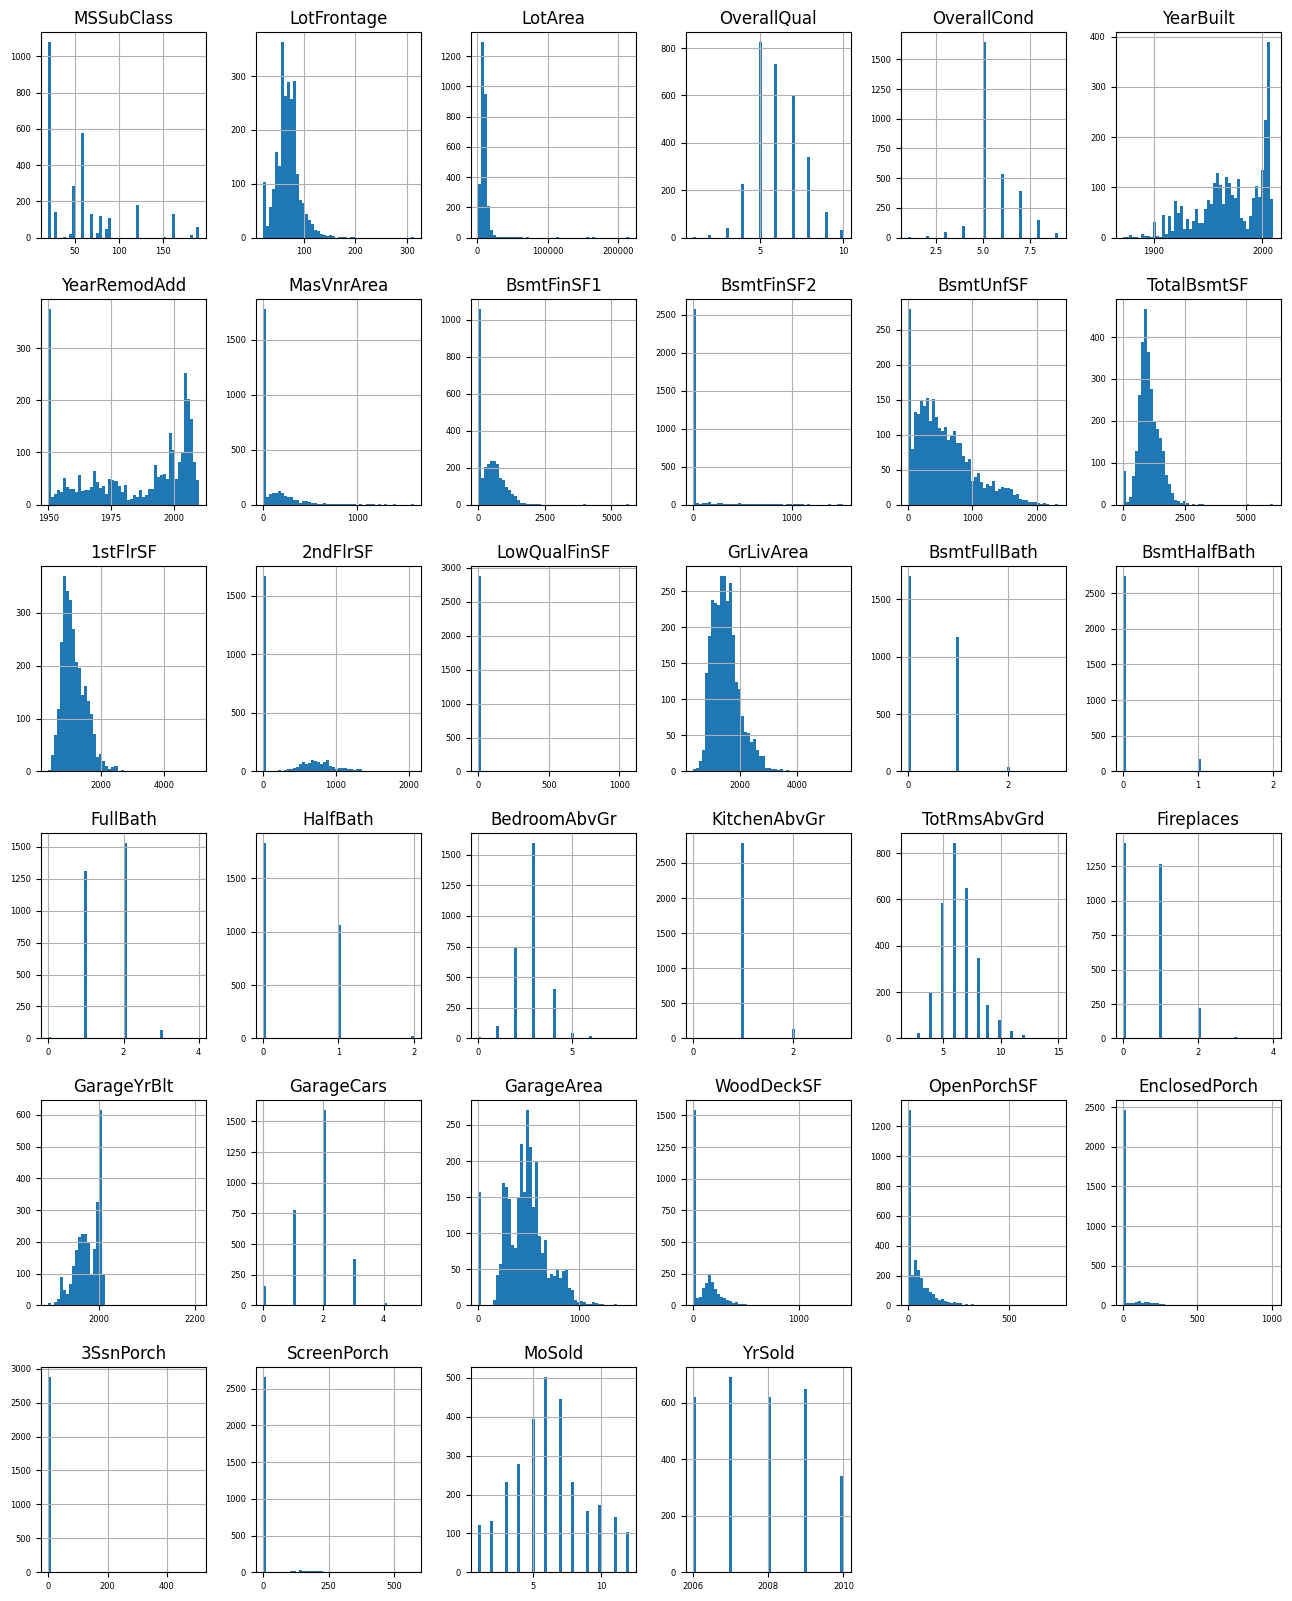

In [13]:
numerical_df.hist(figsize = (16,20), bins = 50, xlabelsize = 6, ylabelsize = 6)
plt.show()

## <a id='5-2'> 5.2 Categorical data</a>

In [14]:
categorical_df = full.drop(columns='SalePrice').select_dtypes(include = 'object')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2915 non-null   object
 1   Street         2919 non-null   object
 2   LotShape       2919 non-null   object
 3   LandContour    2919 non-null   object
 4   Utilities      2917 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  RoofStyle      2919 non-null   object
 13  RoofMatl       2919 non-null   object
 14  Exterior1st    2918 non-null   object
 15  Exterior2nd    2918 non-null   object
 16  MasVnrType     1153 non-null   object
 17  ExterQual      2919 non-null   object
 18  ExterCond      2919 non-null

In [15]:
categorical_unique = categorical_df.nunique().sort_values(ascending = False)
print(categorical_unique)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
Foundation        6
GarageType        6
Heating           6
BsmtFinType2      6
BsmtFinType1      6
SaleCondition     6
RoofStyle         6
BldgType          5
GarageCond        5
GarageQual        5
FireplaceQu       5
Electrical        5
HeatingQC         5
LotConfig         5
MSZoning          5
ExterCond         5
BsmtExposure      4
BsmtCond          4
BsmtQual          4
KitchenQual       4
LandContour       4
ExterQual         4
LotShape          4
LandSlope         3
MasVnrType        3
GarageFinish      3
PavedDrive        3
Utilities         2
Street            2
CentralAir        2
dtype: int64


# <a id='6'> 6. Data Preparation</a>

Let's fill those NaN values to prepare the data for the machine learning model

## <a id='6-1'> 6.1 Numerical data</a>

In [16]:
full[full.columns[full.isna().any()]].select_dtypes(include = ['float64','int64']).isna().sum().sort_values(ascending = False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
dtype: int64

First, I wonder all the NaN value is actually 0. Let's findout.

In [17]:
numerical_column_nan = numerical_df.columns[numerical_df.isna().any()].to_list()

for i in numerical_column_nan:
    print(str(i) + " rows that have 0 as result: " + str(len(full[full[i] == 0][i])))

LotFrontage rows that have 0 as result: 0
MasVnrArea rows that have 0 as result: 1738
BsmtFinSF1 rows that have 0 as result: 929
BsmtFinSF2 rows that have 0 as result: 2571
BsmtUnfSF rows that have 0 as result: 241
TotalBsmtSF rows that have 0 as result: 78
BsmtFullBath rows that have 0 as result: 1705
BsmtHalfBath rows that have 0 as result: 2742
GarageYrBlt rows that have 0 as result: 0
GarageCars rows that have 0 as result: 157
GarageArea rows that have 0 as result: 157


See that 2 column LotFrontage and GarageYrBlt do not have 0 value, so I will replace NaN with 0.

In [18]:
full.loc[:, ['LotFrontage', 'GarageYrBlt']] = full[['LotFrontage', 'GarageYrBlt']].fillna(0)
full[full.columns[full.isna().any()]].select_dtypes(include = ['float64','int64']).isna().sum().sort_values(ascending = False)

MasVnrArea      23
BsmtFullBath     2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
GarageCars       1
GarageArea       1
dtype: int64

In [19]:
full[full['MasVnrArea'].isna()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [20]:
full['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

Let's replace NaN in MasVnrType to None, and 0 in MasVnrArea

In [21]:
full.loc[:, 'MasVnrType'] = full['MasVnrType'].fillna('None')
full.loc[:, 'MasVnrArea'] = full['MasVnrArea'].fillna(0)

In [22]:
full[full.columns[full.isna().any()]].select_dtypes(include = ['float64','int64']).isna().sum().sort_values(ascending = False)

BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
GarageCars      1
GarageArea      1
dtype: int64

I will fill the others column NaN with 0

In [23]:
column_NaN_left = full[full.columns[full.isna().any()]].select_dtypes(include = ['float64','int64']).isna().sum().reset_index()['index']
print(column_NaN_left)

0      BsmtFinSF1
1      BsmtFinSF2
2       BsmtUnfSF
3     TotalBsmtSF
4    BsmtFullBath
5    BsmtHalfBath
6      GarageCars
7      GarageArea
Name: index, dtype: object


In [24]:
for i in column_NaN_left: 
    full.loc[:, i] = full[i].fillna(0)


In [25]:
full[full.columns[full.isna().any()]].select_dtypes(include = ['float64','int64']).isna().sum()

Series([], dtype: float64)

## <a id='6-1'> 6.2 Categorical data</a>

In [26]:
full[full.columns[full.isna().any()]].select_dtypes(include = ['object']).isna().sum().sort_values(ascending = False)

FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSZoning           4
Utilities          2
Functional         2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Let's replace NaN value for FireplaceQu, GarageCond, GarageQual, GarageFinish, GarageType, BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2, BsmtFinType1 to NaN

In [27]:
column_NaN_to_replace = ['FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']

for i in column_NaN_to_replace:
    full.loc[:, i] = full[i].fillna('None')
    
full[full.columns[full.isna().any()]].select_dtypes(include = ['object']).isna().sum().sort_values(ascending = False)

MSZoning       4
Utilities      2
Functional     2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
SaleType       1
dtype: int64

Lets use K-nearest to fill the remaining NaN value. 

In [28]:
#fill MSZoning
knn5 = KNeighborsClassifier(n_neighbors = 5)

X_train = full.loc[full['MSZoning'].notnull(),['MSSubClass']]
y_train = np.ravel(full.loc[full['MSZoning'].notnull(),['MSZoning']])

X_test = full.loc[full['MSZoning'].isna(),['MSSubClass']]

knn5.fit(X_train,y_train)

y_pred_5 = knn5.predict(X_test)

full.loc[full['MSZoning'].isna(), 'MSZoning'] = y_pred_5

In [29]:
full[full.columns[full.isna().any()]].select_dtypes(include = ['object']).isna().sum().sort_values(ascending = False)


Utilities      2
Functional     2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
SaleType       1
dtype: int64

For the others, there's actually no close related with any column. However I hope it will be related to MSSubClass and MSZoning. Because the class and zone should related to many features of the house.

In [34]:

def k_nearest_5(x):
    knn5 = KNeighborsClassifier(n_neighbors=5)

    X_train = full.loc[full[x].notnull(), ['MSSubClass', 'MSZoning']]
    y_train = np.ravel(full.loc[full[x].notnull(), [x]])

    X_test = full.loc[full[x].isna(), ['MSSubClass', 'MSZoning']]

    # One-hot encode categorical variables
    categorical_cols = ['MSZoning']
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
    X_test_encoded = encoder.transform(X_test[categorical_cols])

    # Concatenate encoded features with other numerical features
    X_train_final = np.hstack((X_train_encoded, X_train.drop(columns=categorical_cols)))
    X_test_final = np.hstack((X_test_encoded, X_test.drop(columns=categorical_cols)))

    knn5.fit(X_train_final, y_train)

    y_pred_5 = knn5.predict(X_test_final)

    full.loc[full[x].isna(), x] = y_pred_5

In [35]:
column_NaN_left = full.columns[full.isna().any()]
for i in column_NaN_left:
    k_nearest_5(i)

In [36]:
full.columns[full.isna().any()]

Index([], dtype='object')

In [42]:
for i in column_NaN_left: 
    print(full[i].unique())

['AllPub' 'NoSeWa']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
['Gd' 'TA' 'Ex' 'Fa']
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


Nice, there's no more null value now, let's go to data prediction.

# <a id='7'> 7. Data Prediction</a>

There are many models for data prediction; however, in this project I choose random forest because of it high accuracy and robustness to outliers.
Let's split back the data into test and train dataframe.

In [61]:
# split into train and test dataframe
train_df = full[full['SalePrice'] != ""]
train_df.loc[:, 'SalePrice'] = train_df['SalePrice'].astype('float')

X_train = train_df.drop(columns = 'SalePrice')
y_train = train_df['SalePrice']

test_df = full[full['SalePrice'] == ""] 
X_test = test_df.drop(columns = 'SalePrice')

In [60]:
train_df['SalePrice'].describe()

count       1460
unique       663
top       140000
freq          20
Name: SalePrice, dtype: int64

In [66]:
# Get the categorical columns
categorical_columns = X_train.select_dtypes(include='object').columns

# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Concatenate the encoded features with the remaining numerical columns
X_train_processed = np.concatenate([X_train_encoded, X_train.select_dtypes(exclude='object').values], axis=1)
X_test_processed = np.concatenate([X_test_encoded, X_test.select_dtypes(exclude='object').values], axis=1)

# Create a RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

In [69]:
# Train the model using training sets 
rfr.fit(X_train_processed,y_train)
predict = rfr.predict(X_test_processed)

In [71]:
full.loc[full['SalePrice'] == "", 'SalePrice'] = predict

In [85]:
submission = full.loc[1460:,'SalePrice'].reset_index().rename(columns = {'index':'Id'})
submission['Id'] = submission['Id'] + 1 
submission.to_csv(r'C:\Users\minhh\Documents\Python Project\House_Price\submission.csv', index=False)

# <a id='8'> 8. Summary</a>

Well, this is my second time trying to do something in the Machine Learning field. I surely will come back and update the code later for a higher score. But I think getting a RMSE between the logarithm of the predicted value and the logarithm of the observed sales price only **0.14637** is a success.